# Ajuste de curvas

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/a/a8/Regression_pic_assymetrique.gif" width="400px" height="250px" />

> El **ajuste de curvas** es el proceso de construir una curva (función), que sea el mejor ajuste a una serie de puntos. Las curvas ajustadas pueden ser usadas como asistencia en la visualización de datos, para inferir valores de una función donde no hay datos disponibles, y para resumir la relación entre variables.

**Referencia**:
- https://en.wikipedia.org/wiki/Curve_fitting
___

## 0. Introducción

Consideremos un polinomio de grado uno:

$$y = \beta_1 x + \beta_0.$$

Esta es una **línea recta** que tiene pendiente $\beta_1$. Sabemos que habrá una línea conectando dos puntos cualesquiera. Por tanto, *una ecuación polinómica de primer grado es un ajuste perfecto entre dos puntos*.

Si consideramos ahora un polinomio de segundo grado,

$$y = \beta_2 x^2 + \beta_1 x + \beta_0,$$

este se ajustará exactamente a tres puntos. Si aumentamos el grado de la función a la de un polinomio de tercer grado, obtenemos:

$$y = \beta_3 x^3 + \beta_2 x^2 + \beta_1 x + \beta_0,$$

que se ajustará a cuatro puntos.

**Ejemplos**
1. Encontrar la línea recta que pasa exactamente por los puntos $(3,1)$ y $(2,0)$.
2. Encontrar la parábola que pasa exactamente por los puntos $(0,1)$, $(1,0)$ y $(2,1)$.

**Solución**
1. Consideramos $y=\beta_1 x + \beta_0$. Evaluando en el punto $(3,1)$, obtenemos $\beta_1(3) + \beta_0 = 1$. Ahora, evaluando en el punto $(2,0)$, obtenemos $\beta_1(2) + \beta_0 = 0$. De esta manera,
$$\left[\begin{array}{cc} 1 & 3 \\ 1 & 2\end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1\end{array}\right]=\left[\begin{array}{c} 1 \\ 0\end{array}\right].$$
Resolviendo, $\beta_0=-2, \, \beta_1=1$.

In [1]:
import numpy as np

In [2]:
# Resolvemos para 'B' la ecuación matricial A@B=y
#
# Ejemplo 1
A=np.array([[1,3],
            [1,2]])
y=np.array([1,
            0])
# Multiplicamos (matricialmente) por la inversa de 'A' por la izquierda de 'y'
np.linalg.inv(A)@y # @ -> multiplicación matricial

array([-2.,  1.])

2. Consideramos $y=\beta_2 x^2 + \beta_1 x + \beta_0$. Evaluando en el punto $(0,1)$, obtenemos $\beta_2(0)^2 + \beta_1(0) + \beta_0 = 1$. Ahora, evaluando en el punto $(1,0)$, obtenemos $\beta_2(1)^2 + \beta_1(1) + \beta_0 = 0$. Finalmente, evaluando en el punto $(2,1)$, obtenemos $\beta_2(2)^2 + \beta_1(2) + \beta_0 = 1$. De esta manera,
$$\left[\begin{array}{ccc} 1 & 0 & 0 \\ 1 & 1 & 1 \\ 1 & 2 & 4 \end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \\ \beta_2 \end{array}\right]=\left[\begin{array}{c} 1 \\ 0 \\ 1 \end{array}\right].$$
Resolviendo, $\beta_0=1, \, \beta_1=-2$ y $\beta_2=1$.

In [3]:
A=np.array([[1,0,0],
            [1,1,1],
            [1,2,4]])
y=np.array([1,
            0,
            1])
np.linalg.inv(A)@y

array([ 1., -2.,  1.])

### ¿Qué tienen en común los anteriores problemas?
Las curvas están completamente determinadas por los puntos (datos limpios, suficientes y necesarios).

Esto se traduce en que, al llevar el problema a un sistema de ecuaciones lineales, existe una única solución: **no hay necesidad, ni se puede optimizar nada**.

¿Tendremos datos así de **'*bonitos*'** en la vida real?

La realidad es que los datos que encontraremos en nuestra vida profesional se parecen más a esto...

### ¿Cómo ajustamos una curva a esto?

## 1. Problema básico

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" width="800px" height="250px" />

Consideramos que tenemos un conjunto de n pares ordenados de datos $(x_i,y_i)$, para $i=1,2,3,\dots,n$.

### ¿Cuál es la recta que mejor se ajusta a estos datos?
Consideramos entonces ajustes de la forma $\hat{f}(x) = \beta_0+\beta_1 x = \left[1 \quad x\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right]=\left[1 \quad x\right]\boldsymbol{\beta}$ (lineas rectas).

Para decir '*mejor*', tenemos que definir algún sentido en que una recta se ajuste *mejor* que otra.

**Mínimos cuadrados**: el objetivo es seleccionar los coeficientes $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^\top$, de forma que la función evaluada en los puntos $x_i$ i.e.($\hat{f}(x_i)$) aproxime los valores correspondientes $y_i$.

La formulación por mínimos cuadrados, encuentra los $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$ que minimiza
$$\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2=\sum_{i=1}^{n}(y_i-\left[1 \quad x_i\right]\boldsymbol{\beta})^2=\left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2,$$

donde $\boldsymbol{y}=\left[y_1,\quad\cdots\quad, y_n\right]^\top$, y $\boldsymbol{X}=\left[\begin{array}{ccc}1 & x_1\\ \vdots & \vdots \\ 1 & x_n\end{array}\right].$ Esto es,

$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2$$

In [4]:
import scipy.optimize as opt

In [5]:
# opt.minimize?
#
# 'fun':  criterio de optimización fun(B,x,y)->np.sum((y-f(x))**2)
# 'x0':   condiciones iniciales para 'B'
# 'args': argumentos extras que necesite 'fun' además de 'B' (o sea, 'x' y 'y')

In [6]:
import matplotlib.pyplot as plt

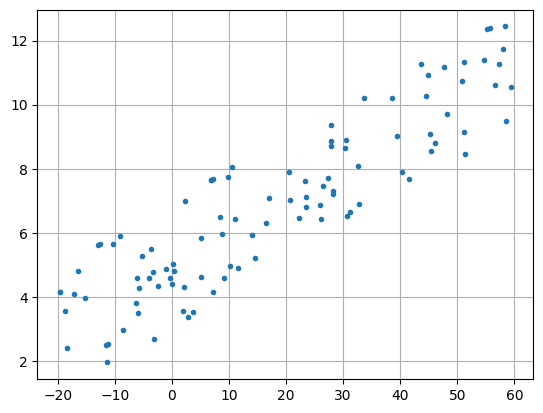

In [7]:
# Nos inventamos unos datos :D
#
np.random.seed(100)
x=np.random.uniform(-20,60,100)
x.sort()
y=5+0.1*x+np.random.uniform(-2,2,100)

plt.plot(x,y,'o',ms=3)
plt.grid()

In [8]:
# Intentamos encontrar una función lineal que se ajuste al conjunto de puntos (x,y)
#
# Definimos nuestro criterio de optimización (mínimos cuadrados)
def fun(B,x,y):
  f=B[0]+B[1]*x
  return np.sum((y-f)**2)

In [9]:
# Definimos una condiciones iniciales para el método numérico
B0=np.random.rand(2) # B0 son dos valores aleatorios entre 0 y 1
B0

array([0.41709074, 0.69559103])

In [10]:
sol=opt.minimize(fun,B0,args=(x,y))
sol

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 131.77377287749576
        x: [ 5.038e+00  1.022e-01]
      nit: 4
      jac: [ 2.098e-05  1.261e-03]
 hess_inv: [[ 8.019e-03 -1.915e-04]
            [-1.915e-04  1.031e-05]]
     nfev: 146
     njev: 45

El objeto de tipo solución `sol` tiene los siguientes atributos:
* `fun`: criterio de optimización optimizado
* `x`: valores que optimizan el criterio

Función obtenida
$$
y=5.038+0.1022x
$$

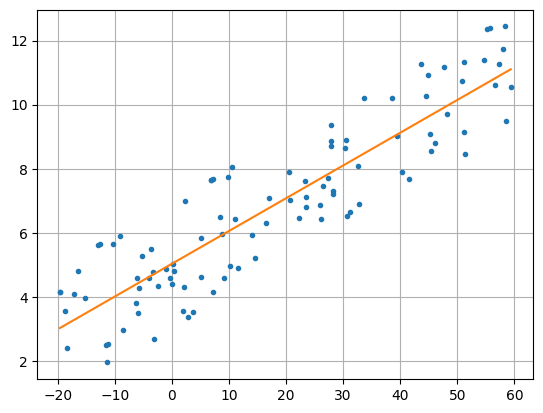

In [11]:
f=sol.x[0]+sol.x[1]*x

plt.plot(x,y,'o',ms=3)
plt.plot(x,f)
plt.grid()

## 2. Ajuste polinomial

Ahora, considere el siguiente conjunto de datos...

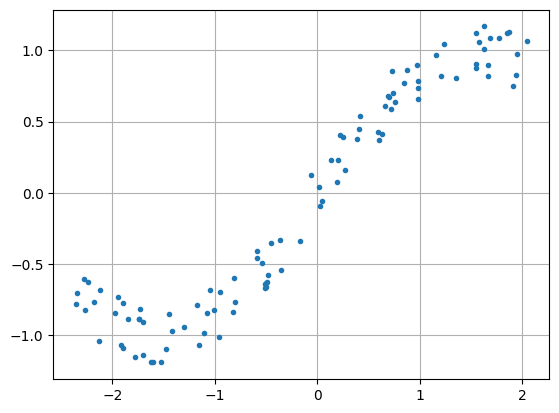

In [12]:
# Definimos otro conjunto de datos
#
np.random.seed(1)
x=np.random.uniform(-3/4*np.pi,2/3*np.pi,100)
x.sort()
y=np.sin(x)+np.random.uniform(-0.2,0.2,100)
plt.plot(x,y,'o',ms=3)
plt.grid()

In [13]:
# Polinomio de grado one
#
sol_1=opt.minimize(fun,B0,args=(x,y))
sol_1

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 6.9824819674275505
        x: [ 3.636e-02  5.671e-01]
      nit: 2
      jac: [ 3.040e-06  1.311e-06]
 hess_inv: [[ 2.765e-01 -4.493e-01]
            [-4.493e-01  7.485e-01]]
     nfev: 15
     njev: 5

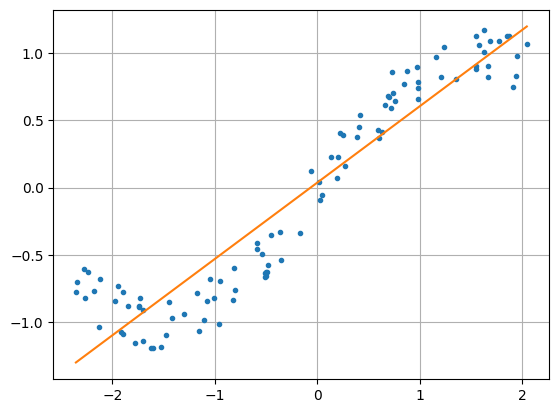

In [14]:
plt.plot(x,y,'o',ms=3)
f=sol_1.x[0]+sol_1.x[1]*x
plt.plot(x,f)
plt.grid()

In [15]:
# Polinomio de grado dos
#
# Redefinimos 'fun'
def fun(B,x,y):
  f=B[0]+B[1]*x+B[2]*x**2
  return np.sum((y-f)**2)

In [16]:
B0=np.random.rand(3) # Ahora necesitamos tres coeficientes: B[0], B[1] y B[2]
sol_2=opt.minimize(fun,B0,args=(x,y))
sol_2

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 5.959252998061882
        x: [-7.713e-02  5.918e-01  6.742e-02]
      nit: 7
      jac: [ 0.000e+00 -5.960e-08  1.192e-07]
 hess_inv: [[ 1.143e-02 -8.158e-04 -3.743e-03]
            [-8.158e-04  3.214e-03  8.153e-04]
            [-3.743e-03  8.153e-04  2.222e-03]]
     nfev: 36
     njev: 9

La función obtenida es:
$$
y=-0.07713+0.5918x+0.06742x^2,
$$
con un error cuadrático acumulado de 5.959.

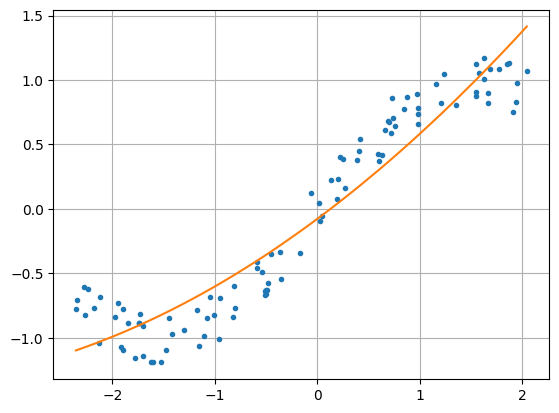

In [17]:
plt.plot(x,y,'o',ms=3)
f=sol_2.x[0]+sol_2.x[1]*x+sol_2.x[2]*x**2
plt.plot(x,f)
plt.grid()

In [19]:
n=len(B0) # Número de elementos en 'B0'
n

3

In [20]:
list(range(n)) # La función 'range' genera elementos entre 0 y n-1

[0, 1, 2]

In [21]:
import sympy as sym

In [22]:
sym.var('v')
X=[v**i for i in range(n)] # Composición de la variable 'v' con potencias desde 0 hasta n-1
X

[1, v, v**2]

In [24]:
# Se puede generar cualquier polinomio a partir de la dimensión de 'B0'
B0=np.random.rand(8)

n=len(B0)
X=[v**i for i in range(n)]
X

[1, v, v**2, v**3, v**4, v**5, v**6, v**7]

In [25]:
np.dot(B0,X) # Polinomio generado

0.394875612923555*v**7 + 0.918733435633606*v**6 + 0.926181426706454*v**5 + 0.549547921508563*v**4 + 0.604310482919973*v**3 + 0.48599066709691*v**2 + 0.390007714141246*v + 0.641566208946338

In [26]:
# Modificamos por última vez el criterio de optimización 'fun',
# para ajustar a cualquier polinomio dependiendo de la dimensión de 'B0'
#
def fun(B,x,y):
  n=len(B)
  X=np.array([x**i for i in range(n)])
  f=np.dot(B,X)
  return np.sum((y-f)**2)

In [32]:
# Ajustamos los datos (x,y) a cualquier polinomio de grado n-1
B0=np.random.rand(3)
sol_2=opt.minimize(fun,B0,args=(x,y))
sol_2

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 5.959252998061881
        x: [-7.713e-02  5.918e-01  6.742e-02]
      nit: 5
      jac: [ 5.960e-08  1.192e-07  5.960e-08]
 hess_inv: [[ 1.140e-02 -8.057e-04 -3.739e-03]
            [-8.057e-04  3.211e-03  8.139e-04]
            [-3.739e-03  8.139e-04  2.221e-03]]
     nfev: 32
     njev: 8

Error acumulado = 1.6170087415247494


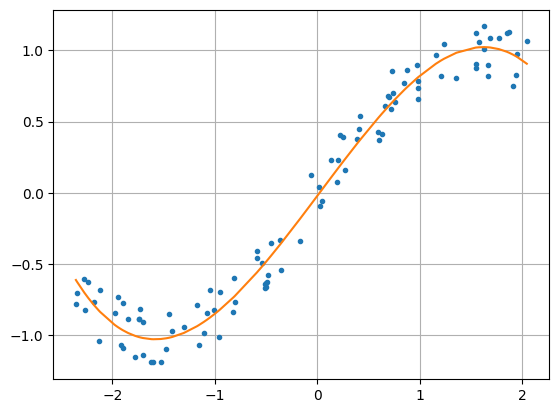

In [35]:
# Polinomio de grado 3
B0=np.random.rand(4)
sol_3=opt.minimize(fun,B0,args=(x,y))

plt.plot(x,y,'o',ms=3)
X=np.array([x**i for i in range(4)])
f=np.dot(sol_3.x,X)
plt.plot(x,f)
plt.grid()
print("Error acumulado = "+str(sol_3.fun))

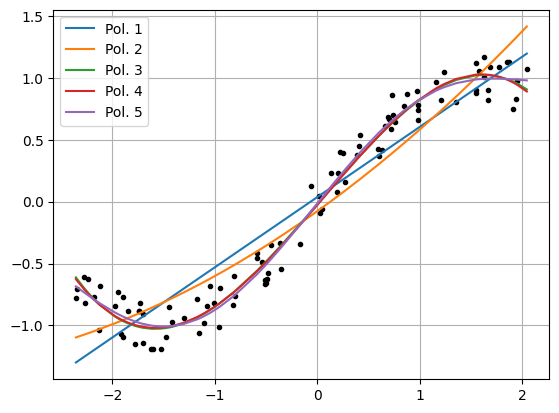

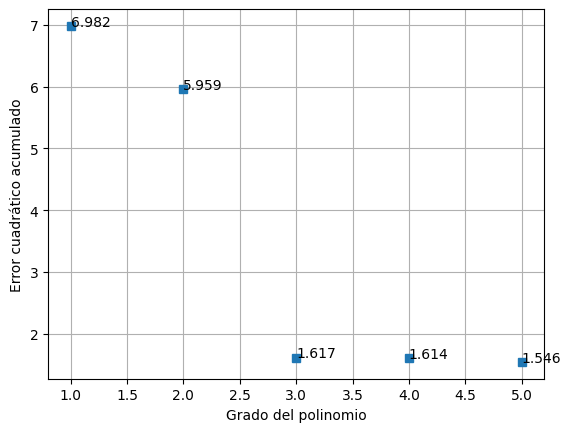

In [44]:
# Ajustamos ahora todos los polinomios desde 1 hasta 5
#
# n=2 # Polinomio de grado n-1
errores=[]
plt.plot(x,y,'ok',ms=3)
for n in range(2,7):
  B0=np.random.rand(n)
  sol=opt.minimize(fun,B0,args=(x,y))
  errores.append(sol.fun)

  X=np.array([x**i for i in range(n)])
  f=np.dot(sol.x,X)
  plt.plot(x,f,label='Pol. '+str(n-1))
plt.legend()
plt.grid()

plt.figure() # Creamos otra figura
plt.plot(range(1,6),errores,'s')
for xL,yL in zip(range(1,6),errores):
  plt.text(xL,yL,round(yL,4))
plt.xlabel('Grado del polinomio')
plt.ylabel('Error cuadrático acumulado')
plt.grid()

In [45]:
# Polinomio de grado 5
sol.x

array([-0.01470083,  1.02700583, -0.01946151, -0.18900675,  0.00885138,
        0.01221871])

## 3. Regularización

Vimos que la solución de mínimos cuadrados es:
$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2.$$

Sin embargo, si crecemos el orden del modelo hay overfitting y algunos coeficientes óptimos $\boldsymbol{\beta}$ crecen muchísimo. Que un coeficiente sea muy grande, significa que se le da mucha importancia a alguna característica (que quizá sea ruido... no sirve para predecir).

La regularización consiste en penalizar la magnitud de los coeficientes $\boldsymbol{\beta}$ en el problema de optimización, para que no crezcan tanto.

### 3.1. Ridge

$$\boldsymbol{\beta}^{ridge} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|^2$$

In [46]:
# np.linalg.norm?

In [47]:
def ridge(B,x,y,lmbd):
  n=len(B)
  X=np.array([x**i for i in range(n)])
  f=np.dot(B,X)
  return np.sum((y-f)**2)+lmbd*np.linalg.norm(B)**2

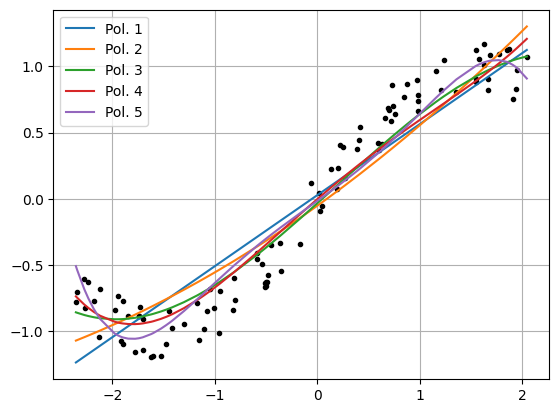

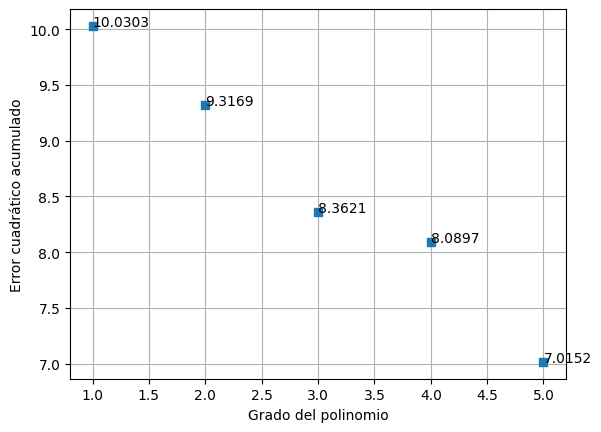

In [52]:
# Copy - paste :D
#
errores=[]
plt.plot(x,y,'ok',ms=3)
for n in range(2,7):
  B0=np.random.rand(n)
  sol=opt.minimize(ridge,B0,args=(x,y,10))
  errores.append(sol.fun)

  X=np.array([x**i for i in range(n)])
  f=np.dot(sol.x,X)
  plt.plot(x,f,label='Pol. '+str(n-1))
plt.legend()
plt.grid()

plt.figure() # Creamos otra figura
plt.plot(range(1,6),errores,'s')
for xL,yL in zip(range(1,6),errores):
  plt.text(xL,yL,round(yL,4))
plt.xlabel('Grado del polinomio')
plt.ylabel('Error cuadrático acumulado')
plt.grid()

### 3.2. Lasso

$$\boldsymbol{\beta}^{lasso} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|_1$$

La norma 1 no es más que la suma de los valores absolutos de las componentes $\left|\left|\boldsymbol{\beta}\right|\right|_1=\sum_{j=0}^m\left|\beta_j\right|$.

In [53]:
def lasso(B,x,y,lmbd):
  n=len(B)
  X=np.array([x**i for i in range(n)])
  f=np.dot(B,X)
  return np.sum((y-f)**2)+lmbd*np.abs(B).sum()

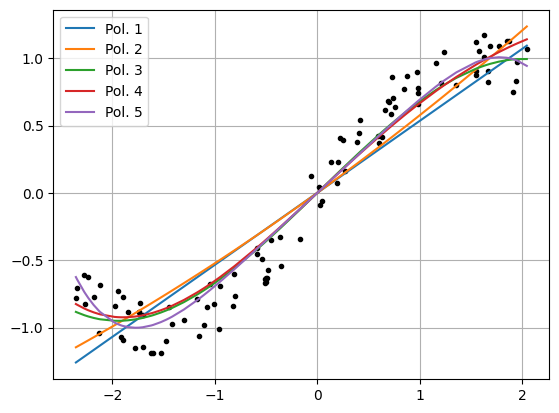

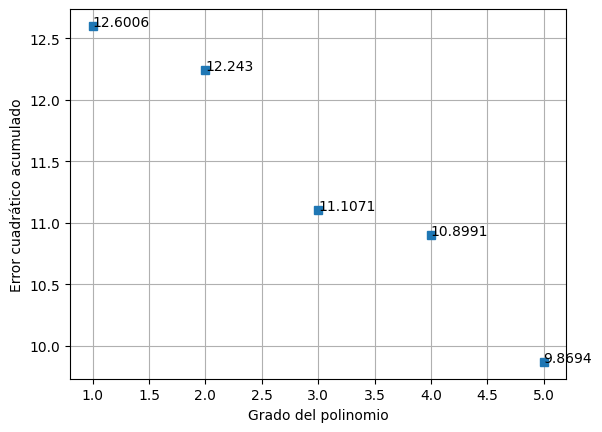

In [57]:
# Copy - paste :D
#
errores=[]
plt.plot(x,y,'ok',ms=3)
for n in range(2,7):
  B0=np.random.rand(n)
  sol=opt.minimize(lasso,B0,args=(x,y,10))
  errores.append(sol.fun)

  X=np.array([x**i for i in range(n)])
  f=np.dot(sol.x,X)
  plt.plot(x,f,label='Pol. '+str(n-1))
plt.legend()
plt.grid()

plt.figure() # Creamos otra figura
plt.plot(range(1,6),errores,'s')
for xL,yL in zip(range(1,6),errores):
  plt.text(xL,yL,round(yL,4))
plt.xlabel('Grado del polinomio')
plt.ylabel('Error cuadrático acumulado')
plt.grid()